### **imports**

In [3]:
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib.axes
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
from sympy import *
from scipy.misc import derivative

### **create dataset** (between -1 and 1)
number of features (n) : 2 \
number of examples (m) : 100 \
number of informative (y) : 1

In [4]:
Y_raw = np.ones(100)
X1_raw = np.ones(100)
X2_raw = np.ones(100)
def randomForX(X_raw):
    for i in range(0,100):
        X_raw[i] = random.uniform(1.0, -1.0)
    return
randomForX(X1_raw)
randomForX(X2_raw)
print(X1_raw)
print(X2_raw)


[ 0.41163826 -0.28987419 -0.19780882 -0.2105428  -0.77256531 -0.33156446
 -0.99150156  0.11956416  0.02174052 -0.80256849  0.35514296 -0.40550424
 -0.21701583 -0.18057522 -0.59841488 -0.11172917  0.67898281 -0.99703499
 -0.07385931 -0.66475439 -0.23251485 -0.79512659 -0.4805419   0.91862179
 -0.74218083  0.00552987 -0.58410461 -0.93067545  0.55762307  0.51484555
 -0.39095681  0.95694583 -0.89031176 -0.52840911  0.10847667 -0.51670295
  0.05924477  0.23150628 -0.37862122 -0.28344481  0.64942066  0.92599732
  0.80202752 -0.79494033 -0.99533124  0.64921062  0.23202534  0.66106807
 -0.97069099  0.63312858 -0.25875729  0.46957499 -0.40718871 -0.68443504
 -0.57972482  0.86376737 -0.73164864  0.64872358 -0.96551796 -0.16908648
 -0.06884092  0.48486589  0.17406808 -0.98694597  0.96404705  0.3505091
 -0.02224879  0.13247094 -0.11453852  0.88947381  0.0516644  -0.50465773
  0.50785787  0.64014038 -0.29759323 -0.09597025 -0.22721663 -0.39746924
  0.30467653 -0.89353166 -0.34951352 -0.48968048 -0.

In [5]:
# shape y
Y_raw = np.array(Y_raw, dtype=np.int)
print(Y_raw)
#print("old shape : " + str(Y_raw.shape))
print("new Y.shape : " + str(Y_raw.shape))
print("new x1.shape : " + str(X1_raw.shape))
print("new x2.shape : " + str(X2_raw.shape))
X1_raw = X1_raw.reshape(1,X1_raw.shape[0])# Birden fazla kez yapınca hata vermesin diye yorumdalar
X2_raw = X2_raw.reshape(1,X2_raw.shape[0])
Y_raw = Y_raw.reshape(1,Y_raw.shape[0])


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
new Y.shape : (100,)
new x1.shape : (100,)
new x2.shape : (100,)


In [32]:
#Normalize Data between [-1,1]x[-1,1] 
 #ALREADY CREATED THAT WAY

In [6]:
#AUFGABE 7.1.1 
#Verwenden Sie die Gerade, die durch diese zwei Punkte verläuft, 
#als die Entscheidungsgrenze ihrer Zielfunktion
#F: Punkte auf der einen Seite der Linie sollen als +1 und die anderen als −1 klassifiziert werden.

def normalizeY():
    for i in range(0,100):
       
        x1 = X1_raw[0,i]
        x2 = X2_raw[0,i]
        if(x1 > x2 or x1 == x2):
            Y_raw[0,i] = 1
        else:
            Y_raw[0,i] = -1
    return
normalizeY()

print(Y_raw)

[[-1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1
  -1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1
  -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1
  -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1
  -1 -1 -1 -1]]


x1 : 0.4116382624341548
x2 : 0.8712323922358534
y : -1


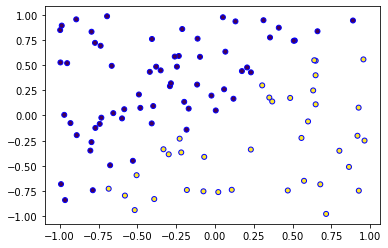

In [18]:
#to understand deeply show points and classes as numbers
print("x1 : " + str(X1_raw[0,0]) )
print("x2 : " + str(X2_raw[0,0]) )
print("y : " + str(Y_raw[0,0]))


#SHOW DATASET AFTER DATASET MODIFICATION
fig , ax = plt.subplots(nrows = 1, ncols = 1)
x1 = X1_raw
x2 = X2_raw
Y = Y_raw
ax.scatter(x1, x2, marker='o', c=Y, s=25, edgecolor='b')
plt.show()

In [52]:
#initialize weights & learning rate & h(x)
W = np.ones(3)
W[0] = 1
W[1] = 1
W[2] = 1
learningRate = 0.001
h=0 


In [53]:

#calculate wTx = h(x)
def calculateWTX(W, x1, x2, i):
    return W[0]+(W[1]*x1[0,i])+(W[2]*x2[0,i])


#calculate sigmoid
def sigmoid(h, i):
    if (h < 0 ):
        return -1
    return 1


#predict    
def predictBetter(W,y, sigmoid, h, cost):    
        
        if(y < sigmoid):
            #prediction must decrease
            W = np.subtract(W , (cost * learningRate))
            
        else:
            #prediction must increase
             W = np.add(W , (cost * learningRate))
                
        return W
        

# find cost function J(h(x), y) = X_d
def findCost(W, y):
   
    x1_d = 0.0
    x2_d = 0.0
    
    #x1 turevini alınmıs halini yazdım direkt
    x1_d = -2*W[1]*(y - (W[0]+(W[1]*x1[0,i])+(W[2]*x2[0,i])))
    
    #x2 turevinin alınmıs hali
    x2_d = -2*W[2]*(y - (W[0]+(W[1]*x1[0,i])+(W[2]*x2[0,i])))
    
    
    X_d = np.ones(3)
    X_d[0] = 1# x0 ist always 1
    X_d[1] = x1_d
    X_d[2] = x2_d
    return X_d

for j in range(0,2000):
    i = j%99
    #find h(wTx=0)
    h = calculateWTX(W, x1, x2, i)
    #find sigmoid(h(wTx))
    s = sigmoid(h, i)
    #get real y value
    y = Y[0,i]
    
    #real value != estimated value
    if (y != s):
        
        X_d = findCost(W,y)
        W = predictBetter(W,y,s,h, X_d)
 
    if(j%100 == 0):
        print('w0  '+ 'w1  '+'w2                             ' + 'x1                 '+ 'x2                    '+ 'real y    '+ 'predicted  ' + 'learning rate  ')
        print(str(W)+' '+ str(x1[0,i])+'  ' + str(x2[0,i])+'         ' + str(y_val) +'          ' + str(s)+'       ' +str(learningRate))

    
    
    
    
    
    

w0  w1  w2                             x1                 x2                    real y    predicted  learning rate  
[0.999      0.99343426 0.99343426] 0.4116382624341548  0.8712323922358534         -1          1       0.001
w0  w1  w2                             x1                 x2                    real y    predicted  learning rate  
[0.946      0.77378824 0.77378824] -0.28987418794813125  0.29070015609435695         -1          1       0.001
w0  w1  w2                             x1                 x2                    real y    predicted  learning rate  
[0.889      0.60663742 0.60663742] -0.19780881897154656  0.13551882173487928         -1          1       0.001
w0  w1  w2                             x1                 x2                    real y    predicted  learning rate  
[0.828      0.48130646 0.48130646] -0.21054279925367858  0.8580000181203238         -1          1       0.001
w0  w1  w2                             x1                 x2                    real y    pr